In [12]:
pip install python-geohash

  Using cached python_geohash-0.8.5-cp39-cp39-linux_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gc
import os
import time
import geohash
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

In [6]:
# SQL engine
from trino.dbapi import connect 
from sqlalchemy import create_engine
import pandas as pd
import time

class TrinoEngine():
    def __init__(self):
        conn = connect(
            host="localhost",
            port=9090,
            catalog="cuebiq"
        )
        self.cur = conn.cursor()
        self.engine = create_engine("trino://localhost:9090/cuebiq/")
    
    def execute_statement(self, query:str) -> list:
        """
        Create and drop statements.
        """
        self.cur.execute(query)
        return self.cur.fetchall()
    
    def read_sql(self, query:str) -> pd.DataFrame: 
        """
        Select and insert into operations.
        """
        return pd.read_sql(query, self.engine)

sql_engine = TrinoEngine()

In [7]:
schema_name = {'cda': 'cuebiq.paas_cda_pe_v3'}

# dl_table = f"{schema_name['cda']}.device_location"  
pe_dl_table = f"{schema_name['cda']}.device_location_uplevelled"

tj_table = f"{schema_name['cda']}.trajectory"     
pe_tj_table = f"{schema_name['cda']}.trajectory_uplevelled"

# stop_table = f"{schema['cda']}.stop" 
pe_stop_table = f"{schema_name['cda']}.stop_uplevelled"

visit_table = f"{schema_name['cda']}.visit " 

In [5]:
sql_engine.read_sql(f"desc {pe_tj_table}")

,Column,Type,Extra,Comment
0,cuebiq_id,bigint,,
1,device_type_code,varchar(5),,
2,os_name,varchar,,
3,start_zoned_datetime,varchar,,
4,start_geohash,varchar,,
5,start_lat,double,,
6,start_lng,double,,
7,start_country,varchar,,
8,start_admin1,varchar,,
9,start_admin2,varchar,,


# test

In [4]:
country_code = 'ID'
start_date = 20190101
end_date = 20191231
event_date = 20191202

In [5]:
pe_tj_table = sql_engine.read_sql(
    f"""
    SELECT *
    FROM {pe_tj_table}
    WHERE 
        start_country = '{country_code}' 
        AND end_country = '{country_code}' 
        AND event_date = {event_date}
    ORDER BY 
        cuebiq_id ASC
    """
)

pe_tj_table

,cuebiq_id,device_type_code,os_name,start_zoned_datetime,start_geohash,start_lat,start_lng,start_country,start_admin1,start_admin2,...,speed_gps_ms_min,speed_gps_ms_avg,speed_gps_ms_max,max_time_gap_seconds,length_meters,trajectory_wkt,start_classification_type,end_classification_type,provider_id,event_date
0,1554309190,GAID,ANDROID,2019-12-02T14:55:06+08:00,w85dundnr,0.520208,117.600736,ID,ID.0014,ID.0014.0002,...,0.0,0.0,0.0,1739,7155.379364,"LINESTRING (117.60074 0.52021, 117.60064 0.520...",OTHER,OTHER,700199,20191202
1,1554365331,GAID,ANDROID,2019-12-02T09:24:59+08:00,w85s716x7,0.755209,117.557306,ID,ID.0014,ID.0014.0002,...,NaN,NaN,NaN,2378,497.089015,"LINESTRING (117.55731 0.75521, 117.56158 0.75651)",OTHER,OTHER,700199,20191202
2,1554429657,GAID,ANDROID,2019-12-02T09:43:47+07:00,w0whmj5eb,3.587703,98.662057,ID,ID.0013,ID.0013.0006,...,0.0,0.0,0.0,604,5409.732131,"LINESTRING (98.66206 3.5877, 98.66476 3.59018,...",OTHER,OTHER,700199,20191202
3,1554453023,GAID,ANDROID,2019-12-02T17:23:58+07:00,w24n2dj38,1.109919,104.091715,ID,ID.0009,ID.0009.0004,...,0.0,0.0,0.0,359,11111.960117,"LINESTRING (104.09172 1.10992, 104.09135 1.109...",OTHER,OTHER,700199,20191202
4,1554453023,GAID,ANDROID,2019-12-02T16:10:40+07:00,w24n8r83k,1.184017,104.074010,ID,ID.0009,ID.0009.0004,...,0.0,0.0,0.0,849,14188.108475,"LINESTRING (104.07401 1.18402, 104.07437 1.184...",OTHER,OTHER,700199,20191202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63668,2805905283,GAID,ANDROID,2019-12-02T23:09:26+07:00,qqguwsy1b,-6.213825,106.817345,ID,ID.0033,ID.0033.0002,...,NaN,NaN,NaN,241,14017.947384,"LINESTRING (106.81734 -6.21383, 106.82694 -6.2...",OTHER,OTHER,700199,20191202
63669,2805907480,GAID,ANDROID,2019-12-02T09:32:45+07:00,qqxcbstne,-8.104036,112.177424,ID,ID.0034,ID.0034.0008,...,NaN,NaN,NaN,295,818.132958,"LINESTRING (112.17742 -8.10404, 112.17863 -8.1...",OTHER,OTHER,700199,20191202
63670,2805907480,GAID,ANDROID,2019-12-02T07:19:52+07:00,qqxcbstne,-8.104031,112.177439,ID,ID.0034,ID.0034.0008,...,NaN,NaN,NaN,295,1074.097845,"LINESTRING (112.17744 -8.10403, 112.17768 -8.1...",OTHER,OTHER,700199,20191202
63671,2805907480,GAID,ANDROID,2019-12-02T07:38:38+07:00,qqxcbdvqk,-8.113672,112.177818,ID,ID.0034,ID.0034.0008,...,NaN,NaN,NaN,446,2294.400175,"LINESTRING (112.17782 -8.11367, 112.1783 -8.10...",OTHER,OTHER,700199,20191202


In [6]:
pe_tj_table.columns

Index(['cuebiq_id', 'device_type_code', 'os_name', 'start_zoned_datetime',
       'start_geohash', 'start_lat', 'start_lng', 'start_country',
       'start_admin1', 'start_admin2', 'start_block_group_id',
       'end_zoned_datetime', 'end_geohash', 'end_lat', 'end_lng',
       'end_country', 'end_admin1', 'end_admin2', 'end_block_group_id',
       'number_of_points', 'duration_minutes', 'speed_kinematic_ms_min',
       'speed_kinematic_ms_avg', 'speed_kinematic_ms_max', 'speed_gps_ms_min',
       'speed_gps_ms_avg', 'speed_gps_ms_max', 'max_time_gap_seconds',
       'length_meters', 'trajectory_wkt', 'start_classification_type',
       'end_classification_type', 'provider_id', 'event_date'],
      dtype='object')

In [19]:
# Define the precision of the geohash
precision = 5

# Apply the geohash encoding for start locations
pe_tj_table['start_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=precision), axis=1)

# Apply the geohash encoding for end locations
pe_tj_table['end_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=precision), axis=1)
# pe_tj_table


# Aggregate the data based on the combination of start_geohash5 and end_geohash5
aggregated_df = pe_tj_table.groupby(['start_geohash5', 'end_geohash5']).agg({
    'cuebiq_id': 'count',
    'number_of_points': 'mean',
    'duration_minutes': 'mean',
    'length_meters':'mean'
}).reset_index()
aggregated_df

,start_geohash5,end_geohash5,cuebiq_id,number_of_points,duration_minutes
0,qpwu3,qpwu3,6,3.333333,84.669444
1,qpwu3,qpwu6,4,3.750000,49.287500
2,qpwu4,qpwu3,1,2.000000,17.983333
3,qpwu6,qpwu3,2,2.000000,68.566667
4,qpwu6,qpwu6,1,5.000000,23.750000
...,...,...,...,...,...
14121,wb9k8,wb9hx,1,4.000000,22.333333
14122,wbdn7,wbdn7,1,7.000000,105.550000
14123,wbdnd,wbdnf,1,2.000000,9.583333
14124,wbdnf,wbdnd,1,2.000000,14.133333


In [21]:
# Define the precision of the geohash
precision = 5

# Apply the geohash encoding for start locations
pe_tj_table['start_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=precision), axis=1)

# Apply the geohash encoding for end locations
pe_tj_table['end_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=precision), axis=1)
# pe_tj_table


# Aggregate the data based on the combination of start_geohash5 and end_geohash5
aggregated_df = pe_tj_table.groupby(['start_geohash5', 'end_geohash5']).agg({
    'cuebiq_id': 'count',
    'number_of_points': 'mean',
    'duration_minutes': 'mean'
}).reset_index()

# Rename the cuebiq_id column for clarity
aggregated_df.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
# aggregated_df

# Filter rows with more than 10 users
filtered_df = aggregated_df[aggregated_df['user_count'] > 10]

# Calculate the number of rows to be removed
rows_to_remove = aggregated_df.shape[0] - filtered_df.shape[0]
total_rows = aggregated_df.shape[0]

# Calculate the percentage of rows to be removed
percentage_removed = (rows_to_remove / aggregated_df.shape[0]) * 100

print(f"Number of rows to be removed: {rows_to_remove}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows to be removed: {percentage_removed:.2f}%")

filtered_df

Number of rows to be removed: 13226
Total number of rows: 14126
Percentage of rows to be removed: 93.63%


,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes
12,qpz6e,qpz6e,57,4.596491,52.643567
19,qpz6g,qpz6g,26,5.346154,96.719231
30,qpz6s,qpz6s,13,6.615385,38.810256
84,qpzmk,qpzmk,13,3.461538,72.443590
101,qpzqh,qpzqh,14,5.428571,58.072619
...,...,...,...,...,...
14048,wb2b9,wb2b9,11,5.272727,47.842424
14094,wb4s6,wb4s6,23,4.043478,61.421739
14095,wb4s6,wb4sd,12,2.583333,22.470833
14097,wb4sd,wb4s6,16,5.250000,70.655208


In [24]:
def g(df):
  return df[df['start_geohash5'] != df['end_geohash5']]

result = g(filtered_df.copy())
result

,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes
309,qqgfq,qqgfw,30,7.766667,63.158889
382,qqgfw,qqgfq,32,7.718750,44.079167
607,qqggt,qqggw,11,5.272727,184.678788
668,qqggw,qqggx,21,7.095238,51.549206
692,qqggx,qqggw,15,7.000000,43.473333
...,...,...,...,...,...
13561,w24n2,w21yr,11,6.000000,46.648485
14009,wb2b2,wb2b3,16,7.750000,57.053125
14018,wb2b3,wb2b2,19,5.421053,56.445614
14095,wb4s6,wb4sd,12,2.583333,22.470833


In [25]:
# Define the precision of the geohash
precision = 4

# Apply the geohash encoding for start locations
pe_tj_table['start_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=precision), axis=1)

# Apply the geohash encoding for end locations
pe_tj_table['end_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=precision), axis=1)
# pe_tj_table


# Aggregate the data based on the combination of start_geohash5 and end_geohash5
aggregated_df = pe_tj_table.groupby(['start_geohash5', 'end_geohash5']).agg({
    'cuebiq_id': 'count',
    'number_of_points': 'mean',
    'duration_minutes': 'mean'
}).reset_index()

# Rename the cuebiq_id column for clarity
aggregated_df.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
# aggregated_df

# Filter rows with more than 10 users
filtered_df = aggregated_df[aggregated_df['user_count'] > 10]

# Calculate the number of rows to be removed
rows_to_remove = aggregated_df.shape[0] - filtered_df.shape[0]
total_rows = aggregated_df.shape[0]

# Calculate the percentage of rows to be removed
percentage_removed = (rows_to_remove / aggregated_df.shape[0]) * 100

print(f"Number of rows to be removed: {rows_to_remove}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows to be removed: {percentage_removed:.2f}%")

filtered_df

Number of rows to be removed: 2446
Total number of rows: 2900
Percentage of rows to be removed: 84.34%


,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes
0,qpwu,qpwu,14,3.285714,63.145238
6,qpz6,qpz6,183,5.868852,69.249454
10,qpz7,qpz7,23,5.869565,89.197101
25,qpzm,qpzm,13,3.461538,72.443590
30,qpzq,qpzq,81,5.691358,59.510082
...,...,...,...,...,...
2858,wb0w,wb0w,13,5.076923,100.073077
2868,wb0z,wb0z,84,4.404762,52.399008
2877,wb2b,wb2b,510,6.309804,63.174575
2881,wb30,wb30,22,5.636364,66.527273


In [26]:
def g(df):
  return df[df['start_geohash5'] != df['end_geohash5']]

result = g(filtered_df.copy())
result

,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes
89,qqgf,qqgg,34,9.794118,84.921078
91,qqgf,qqgu,49,14.755102,119.301361
95,qqgf,qqu4,11,5.636364,53.830303
96,qqgf,qqu5,12,8.916667,81.563889
99,qqgf,qquh,12,18.500000,121.800000
...,...,...,...,...,...
2637,w205,w204,50,7.540000,106.495000
2663,w21v,w21y,19,6.210526,88.651754
2667,w21y,w21v,21,7.952381,90.088095
2671,w21y,w24n,36,7.777778,72.597685


In [27]:
# Define the precision of the geohash
precision = 3

# Apply the geohash encoding for start locations
pe_tj_table['start_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=precision), axis=1)

# Apply the geohash encoding for end locations
pe_tj_table['end_geohash5'] = pe_tj_table.apply(
    lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=precision), axis=1)
# pe_tj_table


# Aggregate the data based on the combination of start_geohash5 and end_geohash5
aggregated_df = pe_tj_table.groupby(['start_geohash5', 'end_geohash5']).agg({
    'cuebiq_id': 'count',
    'number_of_points': 'mean',
    'duration_minutes': 'mean'
}).reset_index()

# Rename the cuebiq_id column for clarity
aggregated_df.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
# aggregated_df

# Filter rows with more than 10 users
filtered_df = aggregated_df[aggregated_df['user_count'] > 10]

# Calculate the number of rows to be removed
rows_to_remove = aggregated_df.shape[0] - filtered_df.shape[0]
total_rows = aggregated_df.shape[0]

# Calculate the percentage of rows to be removed
percentage_removed = (rows_to_remove / aggregated_df.shape[0]) * 100

print(f"Number of rows to be removed: {rows_to_remove}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows to be removed: {percentage_removed:.2f}%")

filtered_df

Number of rows to be removed: 330
Total number of rows: 471
Percentage of rows to be removed: 70.06%


,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes
0,qpw,qpw,14,3.285714,63.145238
3,qpz,qpz,412,5.885922,76.597168
5,qqe,qqe,11,5.727273,126.374242
9,qqg,qqg,17252,6.731104,58.355689
12,qqg,qqu,706,12.089235,110.392540
...,...,...,...,...,...
454,wb0,wb0,162,4.962963,82.281584
458,wb2,wb2,533,6.298311,64.445247
461,wb3,wb3,22,5.636364,66.527273
463,wb4,wb4,100,4.460000,63.061833


In [33]:
def g(df):
  return df[df['start_geohash5'] != df['end_geohash5']]

result = g(filtered_df.copy())
result.reset_index()

,index,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes
0,12,qqg,qqu,706,12.089235,110.392540
1,40,qqs,qqu,33,10.696970,181.493434
2,46,qqt,qqw,16,12.312500,189.466667
3,47,qqu,qqg,692,12.111272,114.267895
4,48,qqu,qqs,36,11.361111,155.207407
5,51,qqu,qqv,19,12.315789,244.682456
6,64,qqv,qqu,18,8.277778,153.494444
7,67,qqv,qqy,13,4.153846,110.630769
8,69,qqw,qqt,15,11.733333,133.448889
9,73,qqw,qqx,16,18.625000,138.305208


# Map

/tmp/ipykernel_510/1092536096.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['geometry'] = filtered_df['start_geohash5'].apply(decode_geohash)


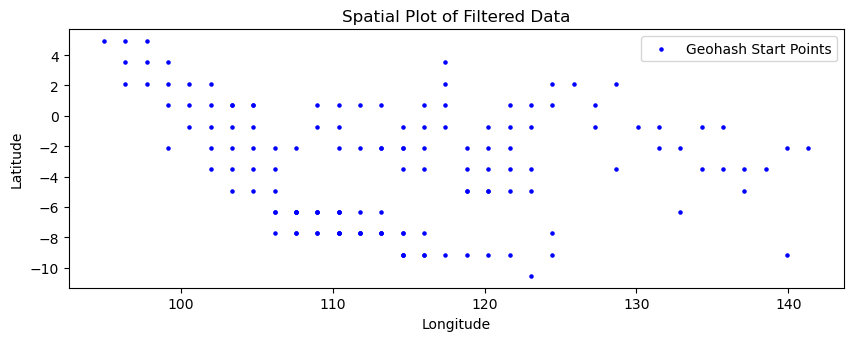

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Function to decode geohash to coordinates
def decode_geohash(gh):
    lat, lng = geohash.decode(gh)
    return Point(lng, lat)

# Decode geohashes to coordinates and create a GeoDataFrame
filtered_df['geometry'] = filtered_df['start_geohash5'].apply(decode_geohash)
gdf = gpd.GeoDataFrame(filtered_df, geometry='geometry')

# Plotting the spatial data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, label='Geohash Start Points')

# Adding titles and labels
ax.set_title('Spatial Plot of Filtered Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()

In [11]:
import folium

# Create a folium map centered around an average location
m = folium.Map(location=[filtered_df['start_geohash5'].apply(lambda x: geohash.decode(x)[0]).mean(),
                         filtered_df['start_geohash5'].apply(lambda x: geohash.decode(x)[1]).mean()], zoom_start=6)

# Add markers to the map
for _, row in filtered_df.iterrows():
    lat, lng = geohash.decode(row['start_geohash5'])
    folium.Marker([lat, lng], popup=f"User Count: {row['user_count']}<br>Avg Points: {row['number_of_points']:.2f}<br>Avg Duration: {row['duration_minutes']:.2f} min").add_to(m)

# Save the map to an HTML file
# m.save('filtered_data_map.html')

# Display the map
m

# Group
To retrieve data from SQL and get aggregation based on the dl cells. 

In [13]:
country_code = 'ID'
event_date = 20190101

In [5]:
pe_tj_df = sql_engine.read_sql(
    f"""
    SELECT *
    FROM {pe_tj_table}
    WHERE 
        start_country = '{country_code}' 
        AND end_country = '{country_code}' 
        AND event_date = {event_date}
    """
)

pe_tj_df

,cuebiq_id,device_type_code,os_name,start_zoned_datetime,start_geohash,start_lat,start_lng,start_country,start_admin1,start_admin2,...,speed_gps_ms_min,speed_gps_ms_avg,speed_gps_ms_max,max_time_gap_seconds,length_meters,trajectory_wkt,start_classification_type,end_classification_type,provider_id,event_date
0,1698362235,GAID,ANDROID,2019-01-01T10:34:46+07:00,qqv4jtt0x,-6.649361,108.530147,ID,ID.0012,ID.0012.0018,...,None,None,None,2721,7100.895023,"LINESTRING (108.53015 -6.64936, 108.53029 -6.6...",OTHER,OTHER,700199,20190101
1,1698362235,GAID,ANDROID,2019-01-01T12:51:01+07:00,qqv1vf6mj,-6.710388,108.537270,ID,ID.0012,ID.0012.0018,...,None,None,None,2802,18444.830648,"LINESTRING (108.53727 -6.71039, 108.41633 -6.7...",OTHER,OTHER,700199,20190101
2,1698362235,GAID,ANDROID,2019-01-01T17:26:05+07:00,qqv16qkkc,-6.776369,108.386044,ID,ID.0012,ID.0012.0004,...,None,None,None,1786,26463.660167,"LINESTRING (108.38604 -6.77637, 108.45846 -6.7...",OTHER,OTHER,700199,20190101
3,1698724621,GAID,ANDROID,2019-01-01T16:38:02+07:00,qqgu7tjuk,-6.255949,106.685333,ID,ID.0020,ID.0020.0009,...,None,None,None,2171,14714.913455,"LINESTRING (106.68533 -6.25595, 106.6789 -6.25...",OTHER,OTHER,700199,20190101
4,1698724621,GAID,ANDROID,2019-01-01T19:20:04+07:00,qqguuchum,-6.190025,106.738927,ID,ID.0033,ID.0033.0001,...,None,None,None,294,221.774887,"LINESTRING (106.73893 -6.19002, 106.73855 -6.1...",OTHER,OTHER,700199,20190101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60608,1511675001,GAID,ANDROID,2019-01-01T11:05:35+08:00,qw3yhy1eq,-8.755533,115.172033,ID,ID.0022,ID.0022.0001,...,None,None,None,26232,6258.448226,"LINESTRING (115.17203 -8.75553, 115.16757 -8.7...",OTHER,OTHER,700199,20190101
60609,1511675001,GAID,ANDROID,2019-01-01T18:43:11+08:00,qw3yhwn49,-8.755639,115.166985,ID,ID.0022,ID.0022.0001,...,None,None,None,1378,1087.872123,"LINESTRING (115.16698 -8.75564, 115.16627 -8.7...",OTHER,OTHER,700199,20190101
60610,1511675001,GAID,ANDROID,2019-01-01T21:38:19+08:00,qw3yhyh0e,-8.756000,115.175331,ID,ID.0022,ID.0022.0001,...,None,None,None,2894,8527.877062,"LINESTRING (115.17533 -8.756, 115.17327 -8.756...",OTHER,OTHER,700199,20190101
60611,1511675001,GAID,ANDROID,2019-01-01T23:27:02+08:00,qw3vyn4sp,-8.799357,115.228383,ID,ID.0022,ID.0022.0001,...,None,None,None,400,64.872622,"LINESTRING (115.22838 -8.79936, 115.22876 -8.7...",OTHER,OTHER,700199,20190101


Index(['cuebiq_id', 'device_type_code', 'os_name', 'start_zoned_datetime',
       'start_geohash', 'start_lat', 'start_lng', 'start_country',
       'start_admin1', 'start_admin2', 'start_block_group_id',
       'end_zoned_datetime', 'end_geohash', 'end_lat', 'end_lng',
       'end_country', 'end_admin1', 'end_admin2', 'end_block_group_id',
       'number_of_points', 'duration_minutes', 'speed_kinematic_ms_min',
       'speed_kinematic_ms_avg', 'speed_kinematic_ms_max', 'speed_gps_ms_min',
       'speed_gps_ms_avg', 'speed_gps_ms_max', 'max_time_gap_seconds',
       'length_meters', 'trajectory_wkt', 'start_classification_type',
       'end_classification_type', 'provider_id', 'event_date'],
      dtype='object')

In [15]:
pe_tj_df = sql_engine.read_sql(
    f"""
    SELECT 
        cuebiq_id,
        start_lat,
        start_lng,
        end_lat,
        end_lng,
        number_of_points,
        duration_minutes,
        length_meters
    FROM {pe_tj_table}
    WHERE 
        event_date = {event_date}
        AND end_country = '{country_code}' 
        AND start_country = '{country_code}' 
    """
)

pe_tj_df

,cuebiq_id,start_lat,start_lng,end_lat,end_lng,number_of_points,duration_minutes,length_meters
0,1699049967,-6.436647,107.077379,-6.402729,107.065904,3,239.066667,4028.236407
1,1698262725,2.817481,99.455834,2.813189,99.453431,3,0.566667,547.318864
2,1698262725,2.813189,99.453431,2.785218,99.250187,15,42.650000,24509.414976
3,1698262725,2.785218,99.250187,2.908716,99.037112,26,60.483333,33584.101854
4,1698262725,2.908716,99.037112,2.854403,98.902825,9,42.333333,16161.568017
...,...,...,...,...,...,...,...,...
60608,988309355,-8.696334,115.172106,-8.809231,115.167587,20,141.800000,50110.425089
60609,988309355,-8.809231,115.167587,-8.808300,115.165320,5,20.500000,295.732104
60610,988309355,-8.808300,115.165320,-8.696393,115.172052,11,53.233333,13762.247989
60611,988309355,-8.696393,115.172052,-8.696952,115.164684,2,9.966667,813.180033


In [16]:
def g(df):
  return df[df['start_geohash5'] != df['end_geohash5']]

In [18]:
# Apply the geohash5 encoding
pe_tj_df['start_geohash5'] = pe_tj_df.apply(
    lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=5), axis=1)
pe_tj_df['end_geohash5'] = pe_tj_df.apply(
    lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=5), axis=1)

# Apply the geohash3 encoding
pe_tj_df['start_geohash3'] = pe_tj_df.apply(
    lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=3), axis=1)
pe_tj_df['end_geohash3'] = pe_tj_df.apply(
    lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=3), axis=1)

pe_tj_df

,cuebiq_id,start_lat,start_lng,end_lat,end_lng,number_of_points,duration_minutes,length_meters,start_geohash5,end_geohash5,start_geohash3,end_geohash3
0,1699049967,-6.436647,107.077379,-6.402729,107.065904,3,239.066667,4028.236407,qqu5k,qqu5s,qqu,qqu
1,1698262725,2.817481,99.455834,2.813189,99.453431,3,0.566667,547.318864,w0w8p,w0w8p,w0w,w0w
2,1698262725,2.813189,99.453431,2.785218,99.250187,15,42.650000,24509.414976,w0w8p,w0qxf,w0w,w0q
3,1698262725,2.785218,99.250187,2.908716,99.037112,26,60.483333,33584.101854,w0qxf,w0w2t,w0q,w0w
4,1698262725,2.908716,99.037112,2.854403,98.902825,9,42.333333,16161.568017,w0w2t,w0w24,w0w,w0w
...,...,...,...,...,...,...,...,...,...,...,...,...
60608,988309355,-8.696334,115.172106,-8.809231,115.167587,20,141.800000,50110.425089,qw3ys,qw3vu,qw3,qw3
60609,988309355,-8.809231,115.167587,-8.808300,115.165320,5,20.500000,295.732104,qw3vu,qw3vu,qw3,qw3
60610,988309355,-8.808300,115.165320,-8.696393,115.172052,11,53.233333,13762.247989,qw3vu,qw3ys,qw3,qw3
60611,988309355,-8.696393,115.172052,-8.696952,115.164684,2,9.966667,813.180033,qw3ys,qw3ys,qw3,qw3


In [20]:
# Aggregate the data based on the combination of start_geohash5 and end_geohash5
aggregated_df5 = pe_tj_df.groupby(['start_geohash5', 'end_geohash5']).agg({
    'cuebiq_id': 'count',
    'number_of_points': 'mean',
    'duration_minutes': 'mean',
    'length_meters': 'mean'
}).reset_index()

# Rename the cuebiq_id column for clarity
aggregated_df5.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
aggregated_df5

,start_geohash5,end_geohash5,user_count,number_of_points,duration_minutes,length_meters
0,qpvzg,qpvzg,2,6.0,18.325000,245.488191
1,qpvzu,qpvzg,1,3.0,26.950000,2240.592518
2,qpvzu,qpvzu,1,4.0,773.750000,178.918013
3,qpxct,qpxgj,1,3.0,229.650000,27612.457875
4,qpxtp,qpxtp,2,3.5,59.091667,289.338483
...,...,...,...,...,...,...
16925,wb9k2,wb9k8,1,2.0,75.700000,110.295889
16926,wb9k8,wb9hx,1,5.0,19.900000,268.446134
16927,wb9k8,wb9k2,1,2.0,47.466667,110.295889
16928,wb9k8,wb9k8,2,7.5,86.050000,1986.504867


In [21]:
aggregated_df5.columns

Index(['start_geohash5', 'end_geohash5', 'user_count', 'number_of_points',
       'duration_minutes', 'length_meters'],
      dtype='object')

In [22]:
celllist = pd.read_csv('/home/jovyan/Data/Agg_DL/ID5/20190102_ID_pe_dl_agg5.csv')
celllist

,geohash_5,point_number,user_number
0,qpz2y,332,13
1,qpz3u,104,12
2,qpz3v,90,11
3,qpz6e,7000,192
4,qpz6g,4267,166
...,...,...,...
2954,wb302,170,15
2955,wb4s6,1246,52
2956,wb4sd,652,38
2957,wb71b,442,16


In [27]:
# Extract the list of geohashes from celllist
geohash_list5 = celllist['geohash_5'].tolist()

# Filter the rows in aggregated_df5
filtered_df5 = aggregated_df5[
    (aggregated_df5['start_geohash5'].isin(geohash_list)) &
    (aggregated_df5['end_geohash5'].isin(geohash_list))
]

# Display the filtered DataFrame
# filtered_df5

# Define the file path
file_path = '/home/jovyan/Data/Agg_TJ/ID5/20190101_ID_pe_tj_agg5.csv'

# Create the directory if it does not exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the DataFrame to CSV
filtered_df5.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /home/jovyan/Data/Agg_TJ/ID5/20190101_ID_pe_tj_agg5.csv


In [28]:
import pandas as pd
import os
import geohash
from datetime import datetime, timedelta

# Set country code and table name
country_code = 'ID'
pe_tj_table = 'cuebiq.paas_cda_pe_v3.trajectory_uplevelled'

# Function to process data for a single day
def process_day(event_date, sql_engine, celllist):
    pe_tj_df = sql_engine.read_sql(
        f"""
        SELECT 
            cuebiq_id,
            start_lat,
            start_lng,
            end_lat,
            end_lng,
            number_of_points,
            duration_minutes,
            length_meters
        FROM {pe_tj_table}
        WHERE 
            event_date = {event_date}
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}' 
        """
    )

    pe_tj_df['start_geohash5'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=5), axis=1)
    pe_tj_df['end_geohash5'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=5), axis=1)

    pe_tj_df['start_geohash3'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=3), axis=1)
    pe_tj_df['end_geohash3'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=3), axis=1)

    aggregated_df5 = pe_tj_df.groupby(['start_geohash5', 'end_geohash5']).agg({
        'cuebiq_id': 'count',
        'number_of_points': 'mean',
        'duration_minutes': 'mean',
        'length_meters': 'mean'
    }).reset_index()

    aggregated_df5.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
    
    geohash_list5 = celllist['geohash_5'].tolist()
    filtered_df5 = aggregated_df5[
        (aggregated_df5['start_geohash5'].isin(geohash_list5)) &
        (aggregated_df5['end_geohash5'].isin(geohash_list5))
    ]

    return filtered_df5

# Load the celllist once
celllist = pd.read_csv('/home/jovyan/Data/Agg_DL/ID5/20190102_ID_pe_dl_agg5.csv')

# Loop through each day of the year 2019
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)
current_date = start_date

while current_date <= end_date:
    event_date = current_date.strftime('%Y%m%d')
    filtered_df5 = process_day(event_date, sql_engine, celllist)

    # Define the file path
    file_path = f'/home/jovyan/Data/Agg_TJ/ID5/{event_date}_ID_pe_tj_agg5.csv'

    # Create the directory if it does not exist
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Save the DataFrame to CSV
    filtered_df5.to_csv(file_path, index=False)
    print(f"File saved to {file_path}")

    # Move to the next day
    current_date += timedelta(days=1)


File saved to /home/jovyan/Data/Agg_TJ/ID5/20190101_ID_pe_tj_agg5.csv
File saved to /home/jovyan/Data/Agg_TJ/ID5/20190102_ID_pe_tj_agg5.csv


KeyboardInterrupt: 

In [30]:
# 需要改的有点乱 下一个变成了def

import pandas as pd
import os
import geohash
from datetime import datetime, timedelta

# Set country code and table name
country_code = 'ID'
pe_tj_table = 'cuebiq.paas_cda_pe_v3.trajectory_uplevelled'

# Function to process data for a single day
def process_day(event_date, sql_engine):
    pe_tj_df = sql_engine.read_sql(
        f"""
        SELECT 
            cuebiq_id,
            start_lat,
            start_lng,
            end_lat,
            end_lng,
            number_of_points,
            duration_minutes,
            length_meters
        FROM {pe_tj_table}
        WHERE 
            event_date = {event_date}
            AND end_country = '{country_code}' 
            AND start_country = '{country_code}' 
        """
    )

    pe_tj_df['start_geohash5'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=5), axis=1)
    pe_tj_df['end_geohash5'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=5), axis=1)

    pe_tj_df['start_geohash3'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=3), axis=1)
    pe_tj_df['end_geohash3'] = pe_tj_df.apply(
        lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=3), axis=1)

    # Aggregate the data based on the combination of start_geohash5 and end_geohash5
    aggregated_df5 = pe_tj_df.groupby(['start_geohash5', 'end_geohash5']).agg({
        'cuebiq_id': 'count',
        'number_of_points': 'mean',
        'duration_minutes': 'mean',
        'length_meters': 'mean'
    }).reset_index()

    # Aggregate the data based on the combination of start_geohash3 and end_geohash3
    aggregated_df3 = pe_tj_df.groupby(['start_geohash3', 'end_geohash3']).agg({
        'cuebiq_id': 'count',
        'number_of_points': 'mean',
        'duration_minutes': 'mean',
        'length_meters': 'mean'
    }).reset_index()

    # Rename the cuebiq_id column for clarity
    aggregated_df5.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
    aggregated_df3.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)
    
    # Load cell lists for geohash5 and geohash3
    celllist5 = pd.read_csv(f'/home/jovyan/Data/Agg_DL/ID5/{event_date}_ID_pe_dl_agg5.csv')
    celllist3 = pd.read_csv(f'/home/jovyan/Data/Agg_DL/ID3/{event_date}_ID_pe_dl_agg3.csv')
    
    geohash_list5 = celllist5['geohash_5'].tolist()
    filtered_df5 = aggregated_df5[
        (aggregated_df5['start_geohash5'].isin(geohash_list5)) &
        (aggregated_df5['end_geohash5'].isin(geohash_list5))
    ]

    geohash_list3 = celllist3['geohash_3'].tolist()
    filtered_df3 = aggregated_df3[
        (aggregated_df3['start_geohash3'].isin(geohash_list3)) &
        (aggregated_df3['end_geohash3'].isin(geohash_list3))
    ]

    return filtered_df5, filtered_df3

# Loop through each day of the year 2019
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)
current_date = start_date

while current_date <= end_date:
    event_date = current_date.strftime('%Y%m%d')
    filtered_df5, filtered_df3 = process_day(event_date, sql_engine)

    # Define the file paths
    file_path_5 = f'/home/jovyan/Data/Agg_TJ/ID5/{event_date}_ID_pe_tj_agg5.csv'
    file_path_3 = f'/home/jovyan/Data/Agg_TJ/ID3/{event_date}_ID_pe_tj_agg3.csv'

    # Create the directories if they do not exist
    os.makedirs(os.path.dirname(file_path_5), exist_ok=True)
    os.makedirs(os.path.dirname(file_path_3), exist_ok=True)

    # Save the DataFrames to CSV
    filtered_df5.to_csv(file_path_5, index=False)
    filtered_df3.to_csv(file_path_3, index=False)
    
    print(f"File saved to {file_path_5}")
    print(f"File saved to {file_path_3}")

    # Move to the next day
    current_date += timedelta(days=1)


File saved to /home/jovyan/Data/Agg_TJ/ID5/20190101_ID_pe_tj_agg5.csv
File saved to /home/jovyan/Data/Agg_TJ/ID3/20190101_ID_pe_tj_agg3.csv
File saved to /home/jovyan/Data/Agg_TJ/ID5/20190102_ID_pe_tj_agg5.csv
File saved to /home/jovyan/Data/Agg_TJ/ID3/20190102_ID_pe_tj_agg3.csv
File saved to /home/jovyan/Data/Agg_TJ/ID5/20190103_ID_pe_tj_agg5.csv
File saved to /home/jovyan/Data/Agg_TJ/ID3/20190103_ID_pe_tj_agg3.csv


KeyboardInterrupt: 

In [6]:
import pandas as pd
import os
import geohash
from datetime import datetime, timedelta
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to process data for a single day
def process_day(event_date, country_code, sql_engine):
    try:
        # Read data from the SQL table
        pe_tj_df = sql_engine.read_sql(
            f"""
            SELECT 
                cuebiq_id,
                start_lat,
                start_lng,
                end_lat,
                end_lng,
                duration_minutes,
                length_meters
            FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
            WHERE 
                event_date = {event_date}
                AND end_country = '{country_code}' 
                AND start_country = '{country_code}' 
            """
        )

        # Encode geohashes
        pe_tj_df['start_geohash5'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=5), axis=1)
        pe_tj_df['end_geohash5'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=5), axis=1)

        pe_tj_df['start_geohash3'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=3), axis=1)
        pe_tj_df['end_geohash3'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=3), axis=1)

        # Aggregate data
        aggregated_df5 = pe_tj_df.groupby(['start_geohash5', 'end_geohash5']).agg({
            'cuebiq_id': 'count',
            'duration_minutes': 'mean',
            'length_meters': 'mean'
        }).reset_index()
        aggregated_df5.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)

        aggregated_df3 = pe_tj_df.groupby(['start_geohash3', 'end_geohash3']).agg({
            'cuebiq_id': 'count',
            'duration_minutes': 'mean',
            'length_meters': 'mean'
        }).reset_index()
        aggregated_df3.rename(columns={'cuebiq_id': 'user_count'}, inplace=True)

        # Load cell lists
        try:
            celllist5 = pd.read_csv(f'/home/jovyan/Data/Agg_DL/{country_code}5/{event_date}_{country_code}_pe_dl_agg5.csv')
            geohash_list5 = celllist5['geohash_5'].tolist()
        except FileNotFoundError:
            logging.warning(f"File for geohash5 not found for date {event_date}. Skipping this date.")
            geohash_list5 = []

        try:
            celllist3 = pd.read_csv(f'/home/jovyan/Data/Agg_DL/{country_code}3/{event_date}_{country_code}_pe_dl_agg3.csv')
            geohash_list3 = celllist3['geohash_3'].tolist()
        except FileNotFoundError:
            logging.warning(f"File for geohash3 not found for date {event_date}. Skipping this date.")
            geohash_list3 = []

        # Filter aggregated data
        filtered_df5 = aggregated_df5[
            (aggregated_df5['start_geohash5'].isin(geohash_list5)) &
            (aggregated_df5['end_geohash5'].isin(geohash_list5))
        ]

        filtered_df3 = aggregated_df3[
            (aggregated_df3['start_geohash3'].isin(geohash_list3)) &
            (aggregated_df3['end_geohash3'].isin(geohash_list3))
        ]

        return filtered_df5, filtered_df3

    except Exception as e:
        logging.error(f"Error processing data for date {event_date}: {e}")
        return pd.DataFrame(), pd.DataFrame()

# Main processing loop
def process_date_range(start_date, end_date, country_code, sql_engine):
    current_date = start_date

    while current_date <= end_date:
        event_date = current_date.strftime('%Y%m%d')
        
        filtered_df5, filtered_df3 = process_day(event_date, country_code, sql_engine)

        # Define file paths
        file_path_5 = f'/home/jovyan/Data/Agg_TJ/{country_code}5/{event_date}_{country_code}_pe_tj_agg5.csv'
        file_path_3 = f'/home/jovyan/Data/Agg_TJ/{country_code}3/{event_date}_{country_code}_pe_tj_agg3.csv'

        # Save results if data is not empty and file does not already exist
        if not filtered_df5.empty and not os.path.exists(file_path_5):
            os.makedirs(os.path.dirname(file_path_5), exist_ok=True)
            filtered_df5.to_csv(file_path_5, index=False)
            logging.info(f"File saved to {file_path_5}")
        else:
            logging.info(f"File already exists or no data for {file_path_5}")

        if not filtered_df3.empty and not os.path.exists(file_path_3):
            os.makedirs(os.path.dirname(file_path_3), exist_ok=True)
            filtered_df3.to_csv(file_path_3, index=False)
            logging.info(f"File saved to {file_path_3}")
        else:
            logging.info(f"File already exists or no data for {file_path_3}")

        # Move to the next day
        current_date += timedelta(days=1)

# Example usage:
process_date_range(datetime(2019, 1, 1), datetime(2019, 1, 10), 'ID', sql_engine)

2024-06-03 20:41:37,734 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190501_ID_pe_tj_agg5.csv
2024-06-03 20:41:37,754 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190501_ID_pe_tj_agg3.csv
2024-06-03 20:42:00,312 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190502_ID_pe_tj_agg5.csv
2024-06-03 20:42:00,332 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190502_ID_pe_tj_agg3.csv
2024-06-03 20:42:23,121 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190503_ID_pe_tj_agg5.csv
2024-06-03 20:42:23,139 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190503_ID_pe_tj_agg3.csv
2024-06-03 20:42:44,464 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190504_ID_pe_tj_agg5.csv
2024-06-03 20:42:44,489 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190504_ID_pe_tj_agg3.csv
2024-06-03 20:43:04,231 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190505_ID_pe_tj_agg5.csv
2024-06-03 20:43:04,247 - INFO - File saved to /home/jovyan/Data/Agg_TJ/I

In [2]:
pip install python-geohash

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import os
import geohash
from datetime import datetime, timedelta
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to process data for a single day
def process_day(event_date, country_code, sql_engine):
    try:
        # Read data from the SQL table
        pe_tj_df = sql_engine.read_sql(
            f"""
            SELECT 
                cuebiq_id,
                start_lat,
                start_lng,
                end_lat,
                end_lng,
                duration_minutes,
                length_meters
            FROM cuebiq.paas_cda_pe_v3.trajectory_uplevelled
            WHERE 
                event_date = {event_date}
                AND end_country = '{country_code}' 
                AND start_country = '{country_code}' 
            """
        )

        # Encode geohashes
        pe_tj_df['start_geohash5'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=5), axis=1)
        pe_tj_df['end_geohash5'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=5), axis=1)

        pe_tj_df['start_geohash3'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['start_lat'], x['start_lng'], precision=3), axis=1)
        pe_tj_df['end_geohash3'] = pe_tj_df.apply(
            lambda x: geohash.encode(x['end_lat'], x['end_lng'], precision=3), axis=1)

        # Aggregate data
        aggregated_df5 = pe_tj_df.groupby(['start_geohash5', 'end_geohash5']).agg({
            'cuebiq_id': 'count',
            'duration_minutes': ['mean', 'median', 'std'],
            'length_meters': ['mean', 'median', 'std']
        }).reset_index()
        aggregated_df5.columns = ['start_geohash5', 'end_geohash5', 'trip_count', 'm_duration_min', 'mdn_duration_min', 'sd_duration_min', 'm_length_m', 'mdn_length_m', 'sd_length_m']

        aggregated_df3 = pe_tj_df.groupby(['start_geohash3', 'end_geohash3']).agg({
            'cuebiq_id': 'count',
            'duration_minutes': ['mean', 'median', 'std'],
            'length_meters': ['mean', 'median', 'std']
        }).reset_index()
        aggregated_df3.columns = ['start_geohash3', 'end_geohash3', 'trip_count', 'm_duration_min', 'mdn_duration_min', 'sd_duration_min', 'm_length_m', 'mdn_length_m', 'sd_length_m']

        # Load cell lists
        try:
            celllist5 = pd.read_csv(f'/home/jovyan/Data/Agg_DL/{country_code}5/{event_date}_{country_code}_pe_dl_agg5.csv')
            geohash_dict5 = celllist5.set_index('geohash_5')['user_number'].to_dict()
        except FileNotFoundError:
            logging.warning(f"File for geohash5 not found for date {event_date}. Skipping this date.")
            geohash_dict5 = {}

        try:
            celllist3 = pd.read_csv(f'/home/jovyan/Data/Agg_DL/{country_code}3/{event_date}_{country_code}_pe_dl_agg3.csv')
            geohash_dict3 = celllist3.set_index('geohash_3')['user_number'].to_dict()
        except FileNotFoundError:
            logging.warning(f"File for geohash3 not found for date {event_date}. Skipping this date.")
            geohash_dict3 = {}

        # Add user numbers to the aggregated data
        aggregated_df5['start_geohash_user'] = aggregated_df5['start_geohash5'].map(geohash_dict5)
        aggregated_df5['end_geohash_user'] = aggregated_df5['end_geohash5'].map(geohash_dict5)

        aggregated_df3['start_geohash_user'] = aggregated_df3['start_geohash3'].map(geohash_dict3)
        aggregated_df3['end_geohash_user'] = aggregated_df3['end_geohash3'].map(geohash_dict3)

        # Filter aggregated data
        filtered_df5 = aggregated_df5.dropna(subset=['start_geohash_user', 'end_geohash_user'])

        filtered_df3 = aggregated_df3.dropna(subset=['start_geohash_user', 'end_geohash_user'])

        # Reorder columns
        filtered_df5 = filtered_df5[['start_geohash5', 'start_geohash_user', 'end_geohash5', 'end_geohash_user', 'trip_count', 'm_duration_min', 'mdn_duration_min', 'sd_duration_min', 'm_length_m', 'mdn_length_m', 'sd_length_m']]
        filtered_df3 = filtered_df3[['start_geohash3', 'start_geohash_user', 'end_geohash3', 'end_geohash_user', 'trip_count', 'm_duration_min', 'mdn_duration_min', 'sd_duration_min', 'm_length_m', 'mdn_length_m', 'sd_length_m']]

        return filtered_df5, filtered_df3

    except Exception as e:
        logging.error(f"Error processing data for date {event_date}: {e}")
        return pd.DataFrame(), pd.DataFrame()

# Main processing loop
def process_date_range(start_date, end_date, country_code, sql_engine):
    current_date = start_date

    while current_date <= end_date:
        event_date = current_date.strftime('%Y%m%d')
        
        filtered_df5, filtered_df3 = process_day(event_date, country_code, sql_engine)

        # Define file paths
        file_path_5 = f'/home/jovyan/Data/Agg_TJ/{country_code}5/{event_date}_{country_code}_pe_tj_agg5.csv'
        file_path_3 = f'/home/jovyan/Data/Agg_TJ/{country_code}3/{event_date}_{country_code}_pe_tj_agg3.csv'

        # Save results if data is not empty and file does not already exist
        if not filtered_df5.empty and not os.path.exists(file_path_5):
            os.makedirs(os.path.dirname(file_path_5), exist_ok=True)
            filtered_df5.to_csv(file_path_5, index=False)
            logging.info(f"File saved to {file_path_5}")
        else:
            logging.info(f"File already exists or no data for {file_path_5}")

        if not filtered_df3.empty and not os.path.exists(file_path_3):
            os.makedirs(os.path.dirname(file_path_3), exist_ok=True)
            filtered_df3.to_csv(file_path_3, index=False)
            logging.info(f"File saved to {file_path_3}")
        else:
            logging.info(f"File already exists or no data for {file_path_3}")

        # Move to the next day
        current_date += timedelta(days=1)

# Example usage:
process_date_range(datetime(2019, 1, 1), datetime(2019, 1, 10), 'ID', sql_engine)


2024-06-05 14:11:10,641 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190101_ID_pe_tj_agg5.csv
2024-06-05 14:11:10,659 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190101_ID_pe_tj_agg3.csv
2024-06-05 14:11:25,013 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190102_ID_pe_tj_agg5.csv
2024-06-05 14:11:25,041 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190102_ID_pe_tj_agg3.csv
2024-06-05 14:11:40,785 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190103_ID_pe_tj_agg5.csv
2024-06-05 14:11:40,805 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190103_ID_pe_tj_agg3.csv
2024-06-05 14:11:57,733 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190104_ID_pe_tj_agg5.csv
2024-06-05 14:11:57,751 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID3/20190104_ID_pe_tj_agg3.csv
2024-06-05 14:12:12,475 - INFO - File saved to /home/jovyan/Data/Agg_TJ/ID5/20190105_ID_pe_tj_agg5.csv
2024-06-05 14:12:12,495 - INFO - File saved to /home/jovyan/Data/Agg_TJ/I

In [18]:
import pandas as pd
df2 = pd.read_csv(f'/home/jovyan/Data/Agg_TJ/ID3/20190101_ID_pe_tj_agg3.csv')
# df.sort_values('event_datetime_local')
df2

,start_geohash3,end_geohash3,trip_count,m_duration_min,mdn_duration_min,sd_duration_min,m_length_m,mdn_length_m,sd_length_m,start_geohash_user,end_geohash_user
0,qpx,qpx,4,117.458333,114.583333,89.523449,12624.091167,11384.085699,14407.499273,43.0,43.0
1,qpz,qpz,480,118.433924,51.808333,173.666545,12536.846437,3117.487169,26943.846476,845.0,845.0
2,qpz,qr8,1,482.350000,482.350000,NaN,271616.478766,271616.478766,NaN,845.0,154.0
3,qpz,w20,2,542.691667,542.691667,101.151625,153218.690956,153218.690956,31846.039182,845.0,1007.0
4,qqe,qqe,8,77.737500,19.241667,103.775565,17287.213993,3183.318967,25619.757410,48.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...
435,wb3,wb3,26,172.079487,45.425000,279.460742,2674.424173,1899.315668,2362.646957,54.0,54.0
436,wb4,wb4,58,83.920402,34.158333,141.681217,4569.924573,1754.497002,7902.446617,87.0,87.0
437,wb4,wb7,1,76.866667,76.866667,NaN,174115.417061,174115.417061,NaN,87.0,28.0
438,wb7,wb7,11,160.890909,24.150000,257.671450,6684.941701,1252.781042,9280.934273,28.0,28.0


In [20]:
df2.columns

Index(['start_geohash3', 'end_geohash3', 'trip_count', 'm_duration_min',
       'mdn_duration_min', 'sd_duration_min', 'm_length_m', 'mdn_length_m',
       'sd_length_m', 'start_geohash_user', 'end_geohash_user'],
      dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv('/home/jovyan/Data/Test/0604/pe_tj_table_20190101.csv')
# df.sort_values('event_datetime_local')
df